# Data Analysis Tools-Assignment 2(Coursera)
## Chi Square Test(Bonferroni Adjustment Post Hoc)

## Study association between student's Exercise and Smoke 

In this assignment, we are required to run a chi-squared test of independence. To do so, we used a survey dataset that contains the responses of 237 Statistics I students at the University of Adelaide to a number of questions. We selected a subset of the data consisting of "Exer" and "Smoke" features because we want to study the dependence between Exercise and Smoke:


- **Exercise**: 
               how often the student exercises- 
               "Freq" (frequently), "Some", "None".

- **Smoke**:
               how much the student smokes-
               "Heavy", "Regul" (regularly), "Occas" (occasionally), "Never".

The **null hypothesis** is that the frequency of student's smoking is not associated with the frequency of student's exercise. To make problem simpler, we classified "Exercise" into two levels: "Yes" for combining "Freq" and "Some", meaning student exercises and "None" meaning student does not exercise. We also recoded the categorical values into numeric values. That is,
- **Exercise**: 
             "None" -> 0, 
             "Freq" & "Some" -> 1 ("Yes").
                 
- **Smoke**: 
             "Never" -> 1,
             "Occas" -> 2, 
             "Regul" -> 3, 
             "Heavy" -> 4.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats



### Data - Bike Sharing Demand

[The data sheet](https://www.kaggle.com/c/bike-sharing-demand/data).<br>

This is the hourly bike rental data for Washington. We consider two categorical variables namely the **Month** and the **Weather** from the data.<br>
We try to infer if the Month has an impact on the Weather.

In [3]:
#Data preparation and transformation
df = pd.read_csv('Survey.csv')
data1 = df.dropna()
data1.head()

,ID,Exercise,Smoke
0,1,Some,Never
1,2,None,Regul
2,3,None,Occas
3,4,None,Never
4,5,Some,Never


In [72]:
newdata= data1.copy()

In [4]:
#Data exploration
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 236
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        236 non-null    int64 
 1   Exercise  236 non-null    object
 2   Smoke     236 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.4+ KB


In [43]:
r_ex = {"Freq":1, "None":0, "Some":1}
r_sm = {"Never":1, "Occas":2, "Regul":3, "Heavy":4}

In [44]:
data2 =data1.copy()

In [45]:
data2['Exercise'] = data2['Exercise'].map(r_ex)
data2['Smoke'] =data2['Smoke'].map(r_sm)

In [46]:
sub1 = pd.crosstab(data2['Exercise'],data2['Smoke'])
print(sub1)

Smoke       1   2   3   4
Exercise                 
0          18   3   1   1
1         171  16  16  10


### note
We first look at the percentages of the columns of the contingency table as follows.
  The column percentages indicate that there may be no association between student exercise and smoke because as smoking frequency increases, exercise frequency (“1”) or no exercise (“0”) has no monotonic pattern.

In [47]:
sumcol = sub1.sum(axis=0)
colpct = sub1/sumcol
print(colpct)

Smoke            1         2         3         4
Exercise                                        
0         0.095238  0.157895  0.058824  0.090909
1         0.904762  0.842105  0.941176  0.909091


In [48]:
print("chi-square value, p value, degree freedom")
cs1 = scipy.stats.chi2_contingency(sub1)
print(cs1[0:3])
print("Expected counts")
print(cs1[3:4])

chi-square value, p value, degree freedom
(1.093423342257849, 0.7786619476134771, 3)
Expected counts
(array([[ 18.41949153,   1.85169492,   1.65677966,   1.0720339 ],
       [170.58050847,  17.14830508,  15.34322034,   9.9279661 ]]),)


## chi-square test Results

  The chi-square statistic is 1.093 with 3 degrees of freedom,
  p-value = 0.779 which is significantly greater than the significant level of 0.05.
   We do not have sufficient evidence to reject the null hypothesis. That is, there is no correlation between the student's exercise and smoking in terms of frequency. This is also verified by the bar chart shown below.

C:\Users\a\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(6.799999999999997, 0.5, 'Proportion Exercise')

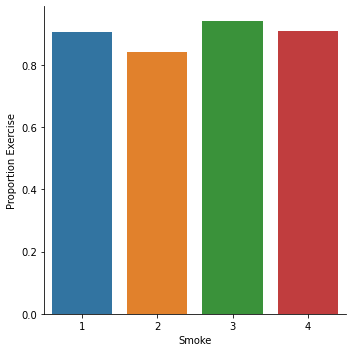

In [49]:
### plot the result

sns.factorplot(x="Smoke", y="Exercise", data=data2, kind="bar", ci=None)
plt.xlabel('Smoke')
plt.ylabel('Proportion Exercise')


## Bonferroni Adjustment for Chi Square

The chi-square test is not significant,
 we perform post hoc comparison just for exercise. 
We first define a function to run the chi-square test for each comparison of smoking, such as "Never" vs "Occas". 
The Bonferrnoi adjustment p-value is 0.05/6 = 0.0083. In other words,
 the difference of comparison like "Never" vs "Occas" is significant if the p-value is smaller than 0.0083. 

In [76]:
#function to calculate the comparison between each pairs of smoke

def comp(smk_level_cmp):
    ctab = pd.crosstab(data1['Exercise'].map(r_ex),data1['Smoke'].map(smk_level_cmp))
    colsum = ctab.sum(axis = 0)
    colpct = ctab/colsum
    print(colpct)
    print("------------------------------")
    cs =  scipy.stats.chi2_contingency(ctab)
    print("chi-square value, p value, degree freedom")
    print(cs[0:3])
    

In [80]:
print("'Never' vs 'Occas'") 
comp({"Never":1, "Occas":2})  

'Never' vs 'Occas'
Smoke          1.0       2.0
Exercise                    
0         0.095238  0.157895
1         0.904762  0.842105
------------------------------
chi-square value, p value, degree freedom
(0.21595226784670993, 0.6421415475803934, 1)


In [81]:
#make for other paris "Never" & "Regul"
print("'Never' vs 'Regul'")    
comp({"Never":1, "Regul":3})

'Never' vs 'Regul'
Smoke          1.0       3.0
Exercise                    
0         0.095238  0.058824
1         0.904762  0.941176
------------------------------
chi-square value, p value, degree freedom
(0.0035368558406256396, 0.952576588238473, 1)


In [82]:
#make for other paris "Never" & "Heavy"
print("'Never' vs 'Heavy'")    
comp({"Never":1, "Heavy":4})

'Never' vs 'Heavy'
Smoke          1.0       4.0
Exercise                    
0         0.095238  0.090909
1         0.904762  0.909091
------------------------------
chi-square value, p value, degree freedom
(0.0, 1.0, 1)


In [70]:
#make for other paris "Occas" & "Regul"
print("'Occas' vs 'Regul'")    
comp({"Occas":2, "Regul":3})

'Occas' vs 'Regul'
Smoke          2.0       3.0
Exercise                    
0         0.157895  0.058824
1         0.842105  0.941176
------------------------------
chi-square value, p value, degree freedom
(0.17066563467492257, 0.6795209134209836, 1)


In [71]:
#make for other paris "Occas" & "Heavy"
print("'Occas' vs 'Heavy'")    
comp({"Occas":2, "Heavy":4})

'Occas' vs 'Heavy'
Smoke          2.0       4.0
Exercise                    
0         0.157895  0.090909
1         0.842105  0.909091
------------------------------
chi-square value, p value, degree freedom
(0.0, 1.0, 1)


In [18]:
#make for other paris "Regul" & "Heavy"
print("'Regul' vs 'Heavy'")    
comp({"Regul":3, "Heavy":4})

'Regul' vs 'Heavy'
Smoke          3.0       4.0
Exercise                    
0         0.058824  0.090909
1         0.941176  0.909091
------------------------------
chi-square value, p value, degree freedom
(0.0, 1.0, 1)


### last result
In summary, the six post hoc comparison p-values are listed as follows. They are all greater than 0.0083 which indicates no any difference between the two different frequency of smoking. 

| Comparison | p-value |Reject Null|
|------------|---------|-----------|
|"Never" vs "Occas"| 0.64 |FALSE |
|"Never" vs "Regul"| 0.95 |FALSE |
|"Never" vs "Heavy"| 1.00 |FALSE |
|"Occas" vs "Regul"| 0.68 |FALSE |
|"Occas" vs "Heavy"| 1.00 |FALSE |
|"Regul" vs "Heavy"| 1.00 |FALSE |